In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
import matplotlib.patches as mpatches

In [45]:
CLN_DATA_PATH='../data/codon_df_clean.csv'

try:
    codon_df_clean = pd.read_csv(CLN_DATA_PATH, index_col=0)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("ERROR: The data file does not exist.")

Data loaded successfully.


## Basic EDA

Distribution of kingdoms

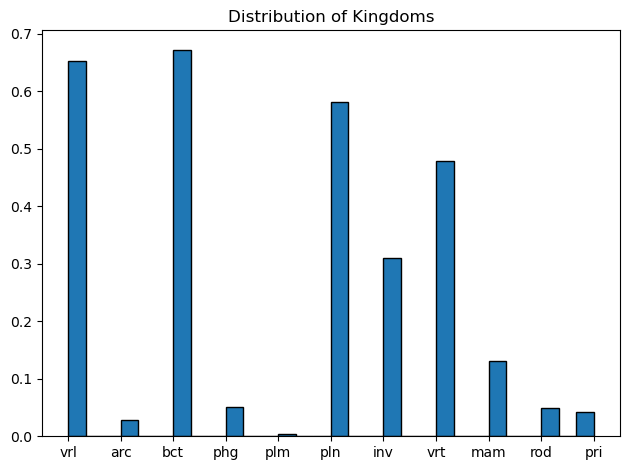

In [3]:
plt.figure()
plt.hist(data=codon_df_clean, x='Kingdom',bins=30, density=True, edgecolor='black')
plt.title('Distribution of Kingdoms')
plt.tight_layout()
plt.show()

A general distribution of the total species per kingdom. 


Codon Frecuency Distribution 

<Figure size 640x480 with 0 Axes>

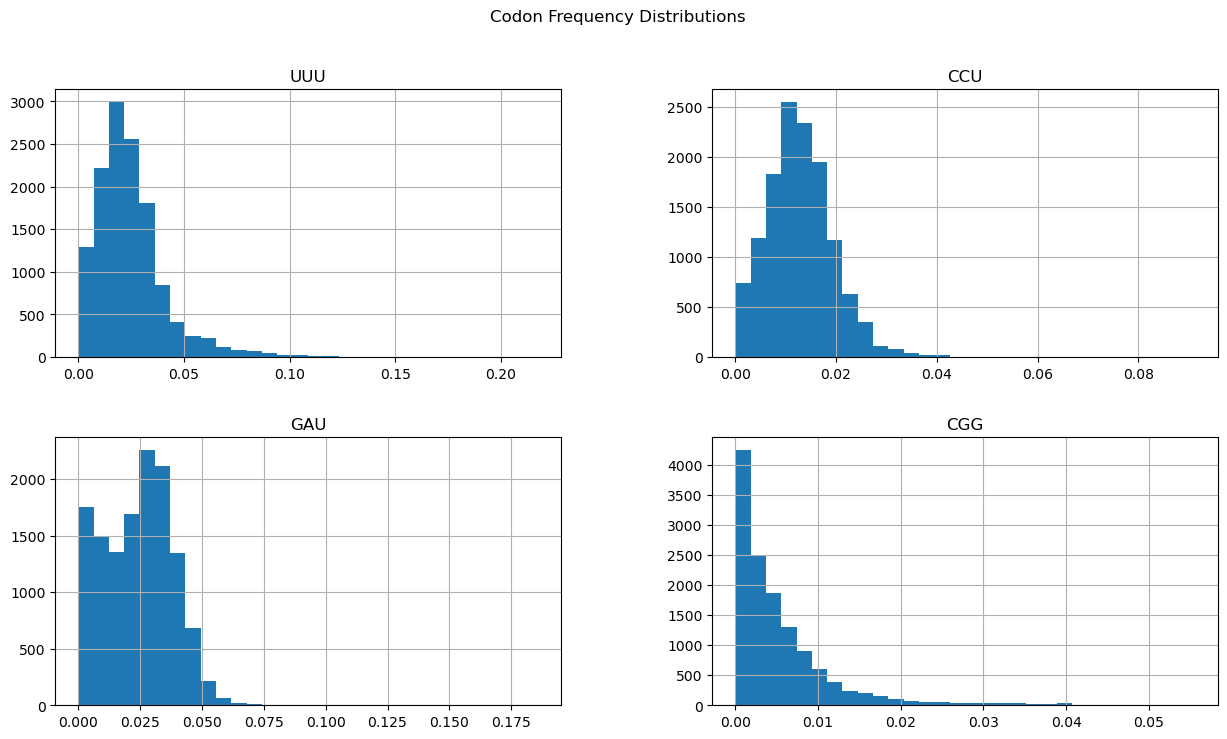

In [4]:
codons = ['UUU', 'CCU', 'GAU', 'CGG']
plt.figure()
codon_df_clean[codons].hist(bins=30, figsize=(15, 8))
plt.suptitle('Codon Frequency Distributions')
plt.show()

It seems that the distributions of codons is not normal

In [5]:
codon_columns = codon_df_clean.columns[5:]
summary_stats = codon_df_clean[codon_columns].describe()
print(summary_stats)

                UUU           UUC           UUA           UUG           CUU  \
count  13026.000000  13026.000000  13026.000000  13026.000000  13026.000000   
mean       0.024818      0.023440      0.020637      0.014104      0.017821   
std        0.017628      0.011598      0.020710      0.009280      0.010587   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.013910      0.015380      0.005610      0.007103      0.010890   
50%        0.021750      0.021905      0.015260      0.013360      0.016130   
75%        0.031308      0.029210      0.029495      0.019808      0.022730   
max        0.217300      0.091690      0.151330      0.101190      0.089780   

                CUC           CUA           CUG           AUU           AUC  \
count  13026.000000  13026.000000  13026.000000  13026.000000  13026.000000   
mean       0.018287      0.019045      0.018452      0.028355      0.025038   
std        0.014573      0.024252      0.016578    

Frequency of DNA Types

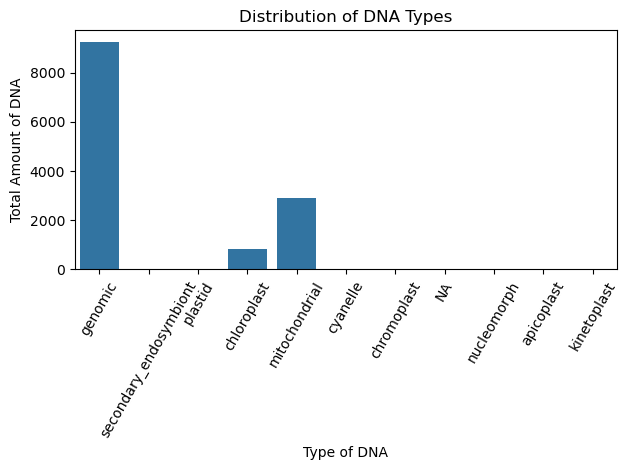

In [6]:
mapping_DNA = {0: 'genomic', 1:'mitochondrial', 2:'chloroplast', 3:'cyanelle', 4:'plastid', 
              5:'nucleomorph', 6:'secondary_endosymbiont', 7:'chromoplast', 8:'leucoplast', 
              9:'NA', 10:'proplastid', 11:'apicoplast', 12:'kinetoplast'}

codon_df_clean['DNAtype_mapped'] = codon_df_clean['DNAtype'].map(mapping_DNA).sort_values()

plt.figure()
sns.countplot(data=codon_df_clean, x='DNAtype_mapped')
plt.title('Distribution of DNA Types')
plt.xlabel('Type of DNA')
plt.ylabel('Total Amount of DNA')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

Mayority of the DNA comes from the nucleous(genomic), followed by mitochondrial and lastly chloroplasts 

No data for the other types of DNA

In [7]:
codon_df_clean['Ncodons']

0            1995
1            1474
2            4862
3            1915
4           22831
           ...   
13023        1097
13024        2067
13025        1686
13026    40662582
13027     8998998
Name: Ncodons, Length: 13026, dtype: int64

Average number of codons per Kingdom

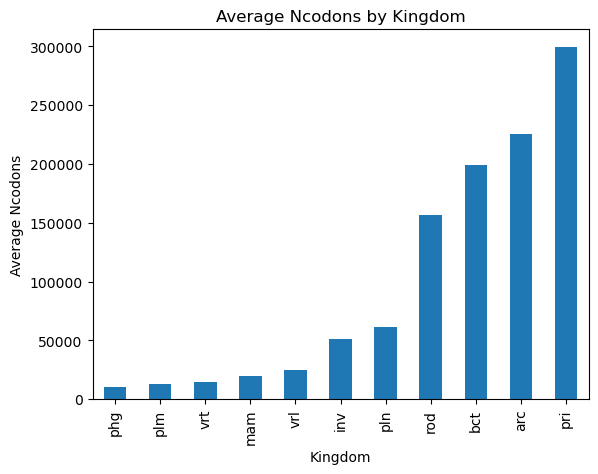

In [8]:
mean_ncodons_by_kingdom = codon_df_clean.groupby('Kingdom')['Ncodons'].mean().sort_values()
plt.figure()
mean_ncodons_by_kingdom.plot(kind='bar')
plt.title('Average Ncodons by Kingdom')
plt.xlabel('Kingdom')
plt.ylabel('Average Ncodons')
plt.show()

An idea of the typical total codon count in the genomes of species within each kingdom.

Larger genomes might have a higher total codon count.

Organisms with higher codon counts might have more genes or longer genes, reflecting more complex regulatory and metabolic processes.

Kingdom-wise Average Codon Frequencies

<Figure size 640x480 with 0 Axes>

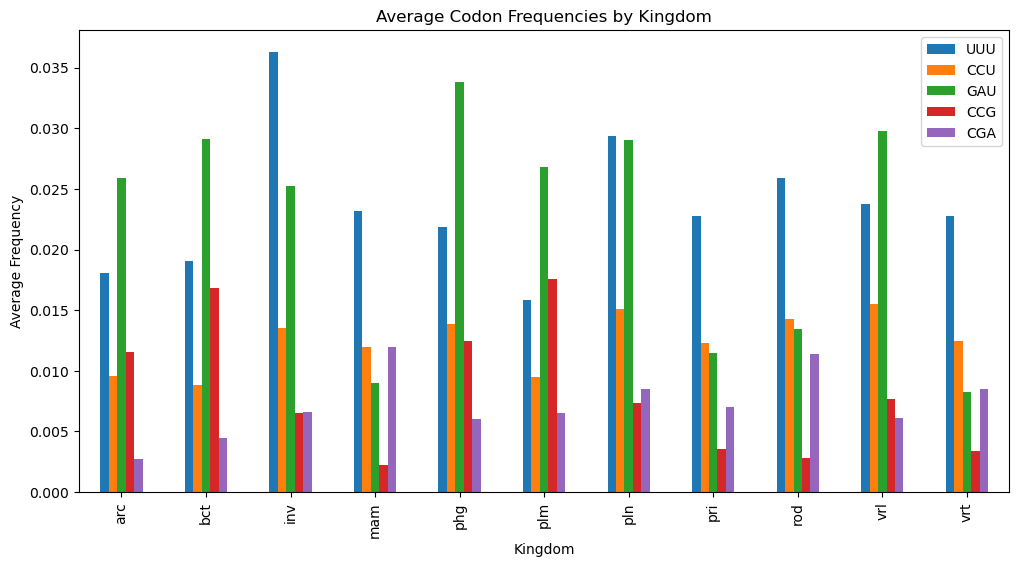

In [9]:
selected_codons = ['UUU', 'CCU', 'GAU', 'CCG', 'CGA']
kingdom_means = codon_df_clean.groupby('Kingdom')[selected_codons].mean()
plt.figure()
kingdom_means.plot(kind='bar', figsize=(12, 6))
plt.title('Average Codon Frequencies by Kingdom')
plt.xlabel('Kingdom')
plt.ylabel('Average Frequency')
plt.show()

The distribution of codons varies across different kingdoms.

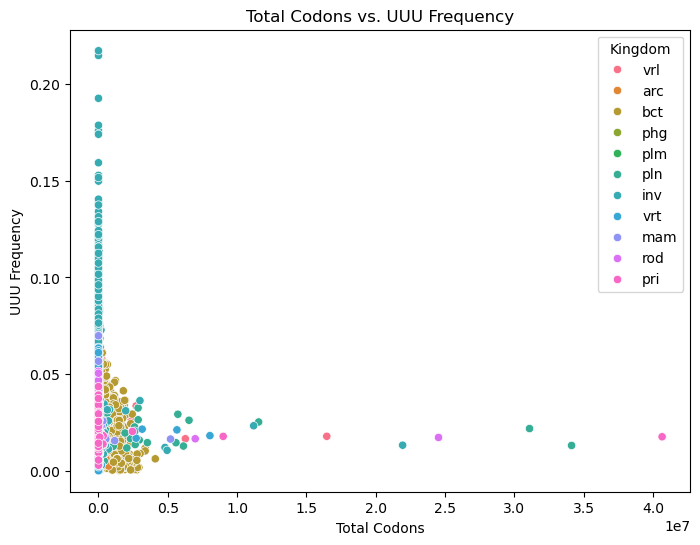

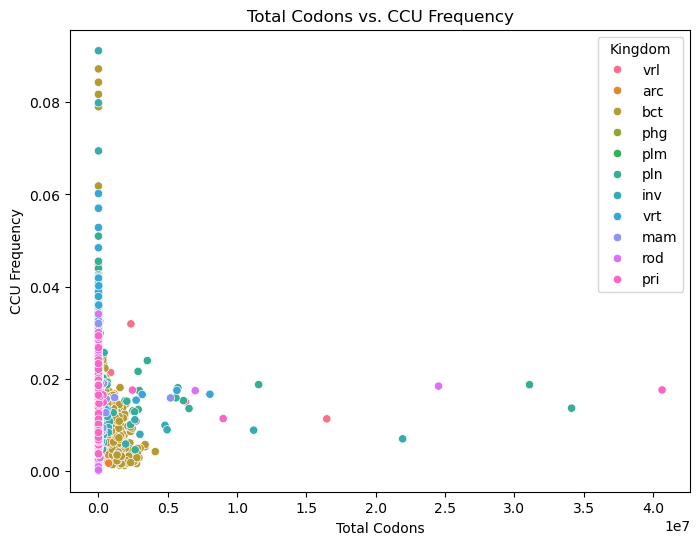

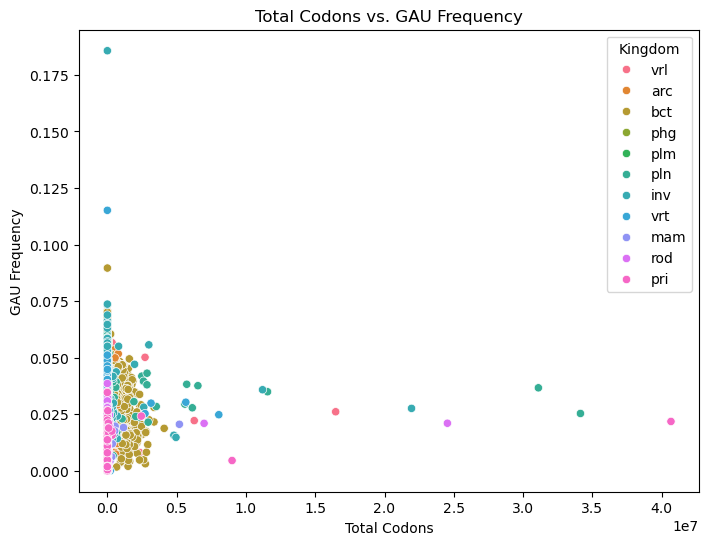

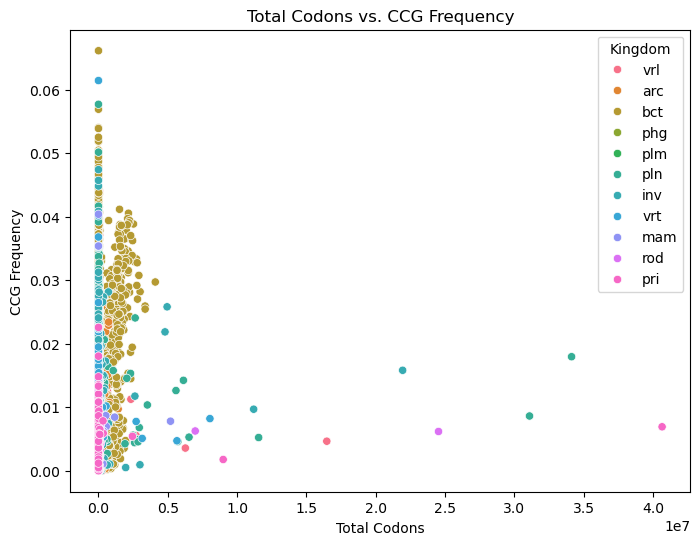

In [10]:
selected_codons = ['UUU', 'CCU', 'GAU', 'CCG']
for codon in selected_codons:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=codon_df_clean, x='Ncodons', y=codon, hue='Kingdom')
    plt.title(f'Total Codons vs. {codon} Frequency')
    plt.xlabel('Total Codons')
    plt.ylabel(f'{codon} Frequency')
    plt.show()

## Intermediate EDA

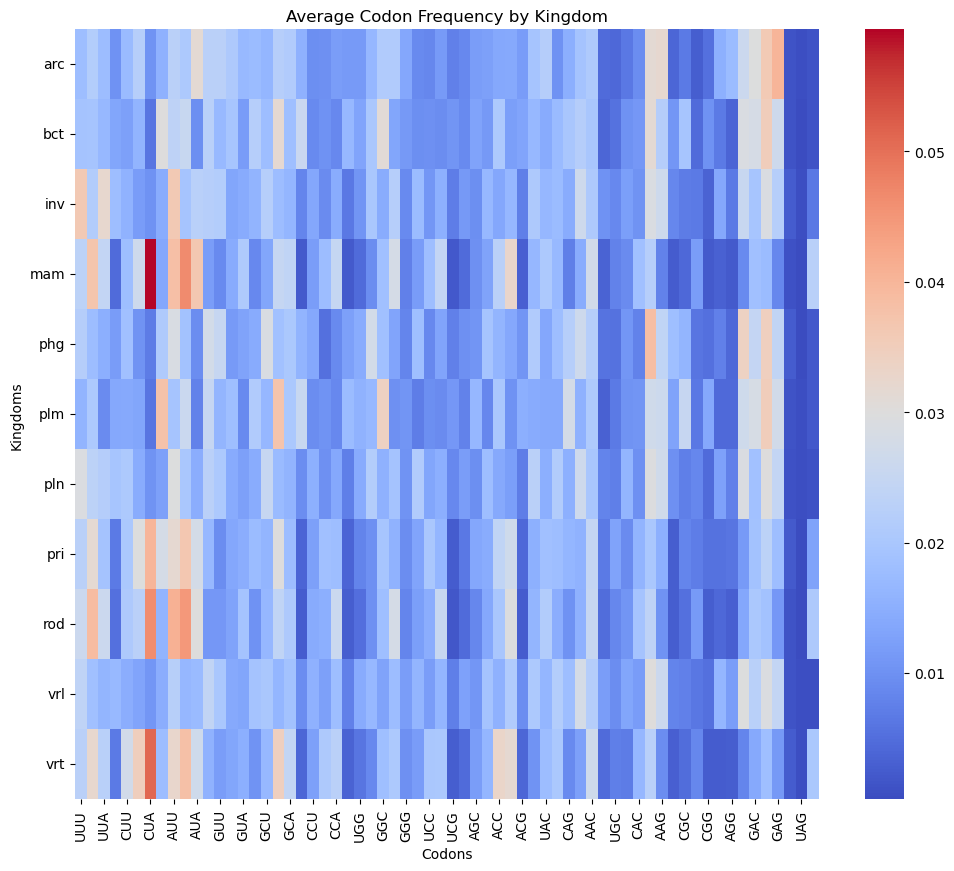

In [65]:
codon_columns = codon_df_clean.columns[5:]
kingdom_agg = codon_df_clean.groupby('Kingdom')[codon_columns].mean()

plt.figure(figsize=(12,10))
sns.heatmap(kingdom_agg, cmap='coolwarm')
plt.title('Average Codon Frequency by Kingdom')
plt.xlabel('Codons')
plt.ylabel('Kingdoms')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

There is colinearity among codons, and it varies across kingdoms.

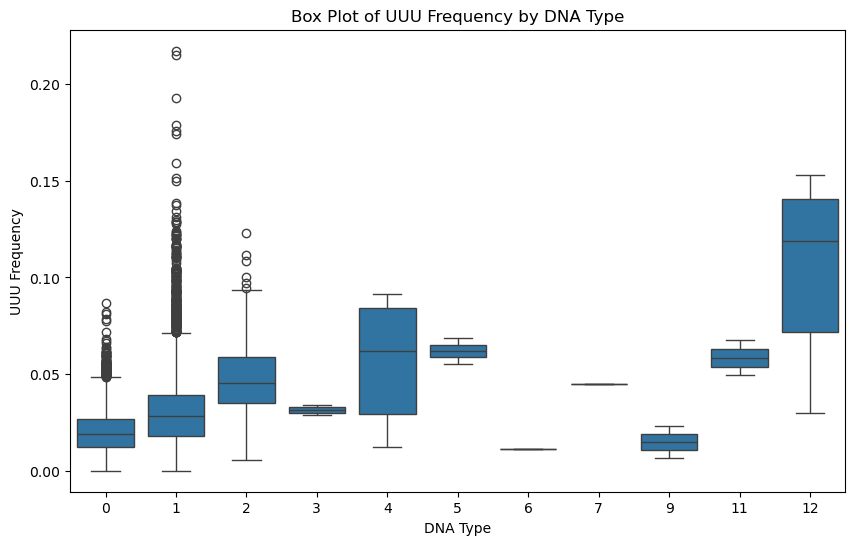

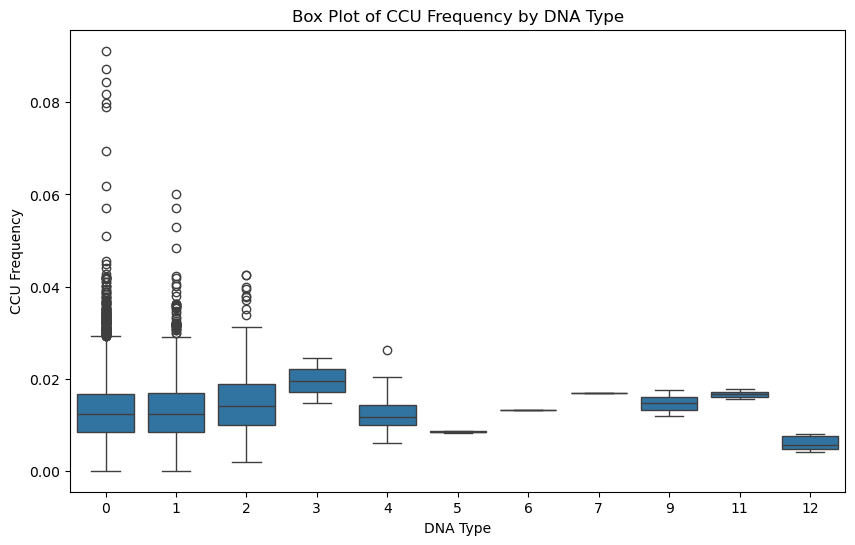

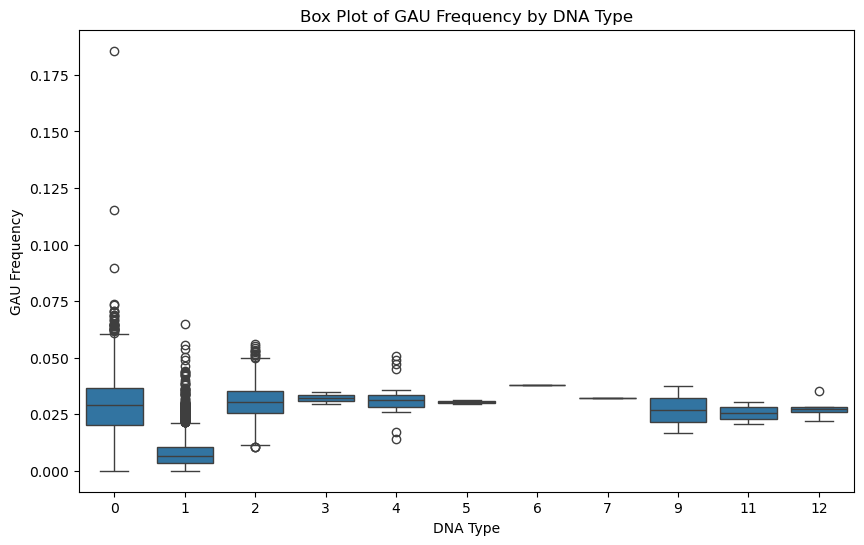

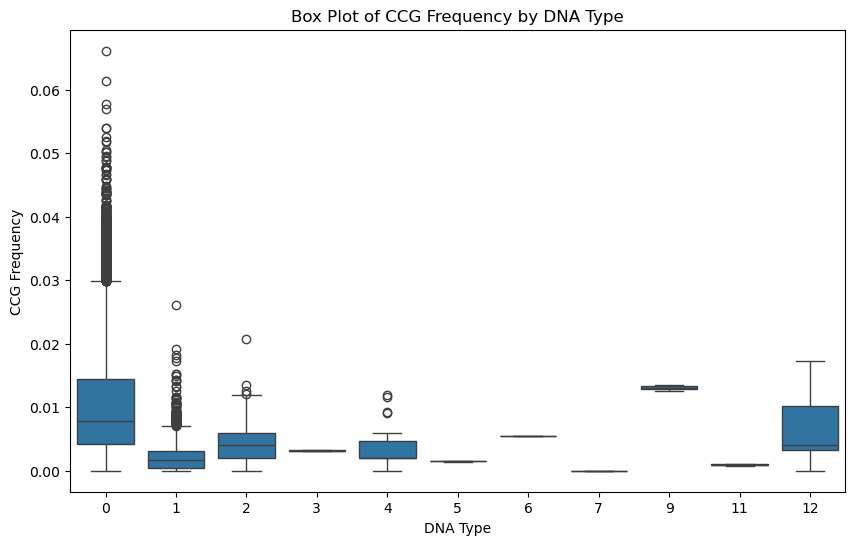

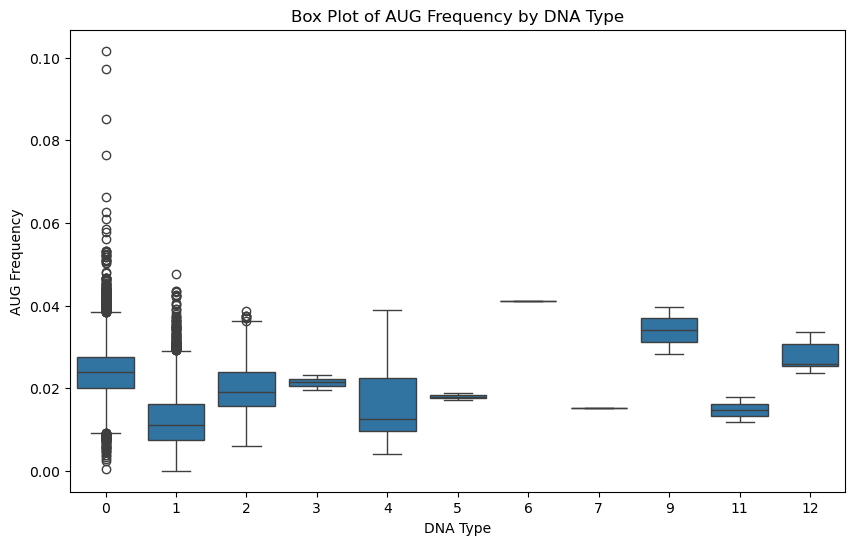

In [13]:
selected_codons = ['UUU', 'CCU', 'GAU', 'CCG', 'AUG']
for codon in selected_codons:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='DNAtype', y=codon, data=codon_df_clean)
    plt.title(f'Box Plot of {codon} Frequency by DNA Type')
    plt.xlabel('DNA Type')
    plt.ylabel(f'{codon} Frequency')
    plt.show()